# COGS 108 - EDA Checkpoint

# Names

- Anurag Asthana
- Michael Granado
- Victorionna Tran
- Alex Bumbalov
- Tianyue (Terry) Zhang

<a id='research_question'></a>
# Research Question

Is there a relationship between a state's number of electric vehicles and its total carbon emission count? 

# Dataset(s)

- Dataset Name: Annual number of EVs (electric vehicles) registered by state(2011-2020)
   - Link to the dataset: https://www.atlasevhub.com/materials/state-ev-registration-data/#data 
   - Number of observations: 16 datasets and each dataset corresponds to a specific state, with over 1,000,000 observations per dataset
   - There are 16 different datasets corresponding to 16 different states. Each of these datasets contains over 1,000,000 EV observations that contain information from variables including the vehicle registration year and model. There are specifically 16 states because only 16 states have had their information made public through the Open Vehicle Registration Initiative. We hope to make our own single dataset from these 16 datasets. Our single custom dataset will have 16 observations for each of the 16 states. The goal is to create 10 variables for each year 2011-2020 which display the count of registered EVs and correspond these to the 16 observations of the documented states. 

 
- Dataset Name: Annual energy-related CO2 emissions by state(2000-2018) in million metric tons
   - Link to the dataset: https://www.eia.gov/environment/emissions/state/excel/table2.xlsx 
   - Number of observations: 50 observations(1 per state)
   - This dataset contains an observation for each of the 50 U.S. states. Variables span from the years 2000-2018 and describe the million metric tons of carbon dioxide produced by energy production. We can trim this dataset down to the 16 states that we have EV registration data about. Then, we can merge this dataset with the dataset containing EV registrations.
 
 
- Dataset Name: Annual electricity energy-related carbon dioxide emissions by state(1980-2018) in million metric tons
   - Link to the dataset: https://www.eia.gov/environment/emissions/state/excel/electricity.xlsx 
   - Number of observations: 50 observations(1 per state)
   - This dataset contains an observation for each of the 50 U.S. states. Variables span from the years 1980-2018 and describe the million metric tons of carbon dioxide specifically produced by electric energy production. We can trim this dataset down to the 16 state observations recorded in the other datasets. Then, this dataset can be merged with the others.

 
- Dataset Name: Annual transportation energy-related carbon dioxide emissions by state(1980-2018) in million metric tons
   - Link to the dataset: https://www.eia.gov/environment/emissions/state/excel/transportation.xlsx 
   - Number of observations: 50 observations(1 per state)
   - This dataset contains an observation for each of the 50 U.S. states. Variables span from the years 1980-2018 and describe the million metric tons of carbon dioxide specifically produced by means of transportation energy production. This dataset is targeted towards transportation vehicles which provide direct tailpipe CO2 emissions. We can trim this dataset down to the 16 state observations recorded in the other datasets. Then, this dataset can be merged with the others.
  
  
- Dataset Name: Annual energy produced by state(1990-2020) in megawatt hours
   - Link to the dataset: https://www.eia.gov/electricity/data/state/annual_generation_state.xls
   - Number of observations: 55,887 observations
   - This dataset contains observations for all 50 states' energy generation from the years 1990-2020. There are a significant amount of observations due to the fact that each state's energy generation is broken down into different sectors such as utilities, industrial, etc. On top of this, each one of these sectors is broken down by energy source such as hydroelectric, coal, etc. Our goal is to trim down the dataset to the 16 state observations, and introduce a new variable that is a state's proportion of renewable to total energy generated.
  
**Combining Datasets:** Our end goal is to have our own complete custom dataset which contains 128 observations. We choose 128 observations because we will have 16 states and 8 years ranging from 2011-2018 associated with each state. We choose 16 states because those states have the public EV registration data. We choose the years 2011-2018 because these years are commonly intersected among all datasets. Our variables will consist of the number of EVs registered, metric million tons of energy-related CO2 emissions, metric million tons of electricity energy-related carbon dioxide emissions, metric million tons of transportation energy-related carbon dioxide emissions, and proportion of renewable to total energy generated. Something to note is that the datasets of electricity energy-related carbon dioxide emissions and transportation energy-related carbon dioxide emissions are not directly related to the research question. However, we include them because we beleive they are will provide additional insight on a more specific level as to why or why not a relationship exists. We also include states' proportions of renewable to total energy generated as a potential confound variable if a relationship between number of electric vehicles and carbon emission count does exist.

# Setup

In [1]:
# Libraries that will be used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
# Turn off warning message
import warnings
warnings.filterwarnings('ignore')

# Display options for Pandas DataFrames'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# List of states that the data will be filtered by
states = ['California', 'Colorado', 'Montana', 'Minnesota', 'New York', 'Vermont', 'Virginia', 'Washington']

# List of years that the data will be filtered by (2011-2018 inclusive)
years = range(2011,2019)

In [2]:

# There are 16 EV State Registration .csv files which are too big (> 200 M) to be stored Github repo, 
# so instead they are loaded from the web
state_EV_registrations = ['https://www.atlasevhub.com/public/dmv/ca_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/co_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/ct_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/fl_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/mt_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/mi_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/mn_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/nj_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/ny_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/or_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/tn_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/tx_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/vt_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/va_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/wa_ev_registrations_public.csv',
          'https://www.atlasevhub.com/public/dmv/wi_ev_registrations_public.csv',]

# Annual Energy Generated by State file is also too big to be stored on Github repo
annual_energy_by_state = pd.read_excel('https://www.eia.gov/electricity/data/state/annual_generation_state.xls')

# Annual energy-related CO2 emissions by state
annual_energy_related_CO2_em = pd.read_csv('datawrangling/annual_energy_related_CO2_emissions.csv')

# Annual electric energy-related CO2 emissions by state
electric_energy_CO2_em_by_state = pd.read_csv('datawrangling/annual_electricity_related_CO2_emissions.csv')

# Annual transportation energy-related CO2 emissions by state
transportation_energy_CO2_em_by_state = pd.read_excel('datawrangling/annual_transportation_related_CO2_emissions.xlsx')


# Data Cleaning

### Annual number of EVs (electric vehicles) registered by state

The annual number of EVs registered by state data comes in the form of 16 datasets. Each one of these datasets corresponds to an individual state. The first step is to load all of the dataframes into a list. We know previously from visually looking at the datasets that none go before 2011 and none go past 2021. Based on the fact that our other datasets regarding CO2 emmisions range from 2000-2018, we determined to filter all of our data to the years 2011-2018. So, we iterate through each one of the datasets located in our list, calculated the value counts of electric vehicles registered per year from 2011 to 2018. This data is placed into our own custom datasets, and any data that is not complete from 2011-2018 is not included. We had an original target of 16 states, however, due to the fact that half of the states had incomplete data, we end up with 8. Our final dataset is a total of 8 states which have the counts of EVs registration from 2011-2018. Additionally, we store the number of EVs registered by model and year in a separete dataset in case we choose to use it later.

In [3]:
## Annual number of EVs (electric vehicles) registered by state

EV_registration_columns = ['State', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
total_states = ['California', 'Colorado', 'Connecticut', 'Florida', 'Montana', 'Michigan', 'Minnesota', 'New Jersey', 
            'New York', 'Oregon', 'Tennessee', 'Texas', 'Vermont', 'Virginia', 'Washington', 'Wisconsin']
EV_registration = pd.DataFrame(columns = EV_registration_columns)
EV_model_cloumns = ['State', 'Year', 'Model', 'Amount']
EV_model = pd.DataFrame(columns = EV_model_cloumns)

# process data from each state (16 in total)
for i in range(16):
    curr_state = total_states[i]
    curr_table = state_EV_registrations[i]
    table = pd.read_csv(curr_table, low_memory=False)
    table['Registration Valid Date'] = pd.to_datetime(table['Registration Valid Date'])
    table['Registration Valid Date'] = table['Registration Valid Date'].dt.year
    table = table[table['Registration Valid Date'].notna()]
    table['Registration Valid Date'].astype(int).dtypes
    table = table[(table['Registration Valid Date'] >= 2011) & (table['Registration Valid Date'] <= 2018)]
    table = table.sort_values(by='Registration Valid Date')
    annual_registration_amount = table['Registration Valid Date'].value_counts(sort = False).tolist()

    # ONLY process states having data for all 8 years (2011-2018) 
    if len(annual_registration_amount) == 8:

        # add new row (representing the annual number of EV registered in current state) to table 'EV_registration' 
        newrow_data = [curr_state] + annual_registration_amount
        newrow_df = pd.DataFrame([newrow_data],columns = EV_registration_columns) 
        EV_registration = pd.concat([EV_registration, newrow_df], axis='rows', ignore_index=True)
        
        for j in range(8):
            # add new row (representing the annual amount of EV (by model) registered in current state) to table 'EV_model' 
            curr_year = 2011 + j
            curr_year_table = table[table['Registration Valid Date'] == curr_year]
            if 'Vehicle Name' not in table.columns:
                curr_year_table = curr_year_table.assign(Vehicle_Name = lambda x: x.Make + x.Model)
                curr_year_table = curr_year_table.rename(columns={'Vehicle_Name': 'Vehicle Name'})
            curr_year_model = curr_year_table['Vehicle Name'].value_counts(sort = False).keys().tolist()
            curr_year_model_amount = curr_year_table['Vehicle Name'].value_counts(sort = False).tolist()
            model_amount = len(curr_year_table['Vehicle Name'].unique())
            for k in range(model_amount):
                curr_model = curr_year_model[k]
                curr_model_amount = curr_year_model_amount[k]
                newrow_data = [curr_state,curr_year,curr_model,curr_model_amount]
                newrow_df = pd.DataFrame([newrow_data],columns = EV_model_cloumns) 
                EV_model = pd.concat([EV_model, newrow_df], axis='rows', ignore_index=True)
    else:
        # Print out which states do not have complete data from 2011-2018
        print(curr_state + ' only has data in ' + str(table['Registration Valid Date'].unique()) + ' among the period 2011-2018')
        
## Number of EVs by model and year are also saved in the dataframe 'EV_model' in case we decide to use this data

#Number of EV registered in the 8 remaining states
EV_registration

Connecticut only has data in [2011 2012 2013 2014 2015 2016 2018] among the period 2011-2018
Florida only has data in [2018] among the period 2011-2018
Michigan only has data in [2013 2014 2015 2016 2017 2018] among the period 2011-2018
New Jersey only has data in [2017 2018] among the period 2011-2018
Oregon only has data in [] among the period 2011-2018
Tennessee only has data in [] among the period 2011-2018
Texas only has data in [] among the period 2011-2018
Wisconsin only has data in [2018] among the period 2011-2018


,State,2011,2012,2013,2014,2015,2016,2017,2018
0,California,5857,18356,52427,108939,166168,230171,322762,448567
1,Colorado,308,1046,2529,4129,6062,8958,13180,18020
2,Montana,10,18,28,43,52,59,132,866
3,Minnesota,12,28,67,77,148,1508,3377,16825
4,New York,2231,7977,10541,43608,43562,99669,263332,509295
5,Vermont,20,104,187,160,401,1104,2060,1974
6,Virginia,37,30,45,37,291,2596,12441,19466
7,Washington,2454,4919,12814,17769,23206,30696,39872,59276


### Annual energy-related CO2 emissions by state (in million metric tons)

The annual energy-related CO2 emissions by state dataset was already very tidy. All 50 states were present with complete numerical data ranging from the years 2000-2018. As we previously determined an overlap in the years 2011-2018 to be present between CO2 emission and EV registration data, all we needed to do was remove the years 2000-2010. Additionally, we dropped all other states except the 8 which we have EV registration data for. We are left with a dataset that includes our targeted 8 states and their annual energy-related CO2 emissions for the years 2011-2018 in million metric tons.

In [4]:
## Annual energy-related carbon dioxide emissions by state

# Filtering by the states in the EV dataset
annual_energy_related_CO2_em = annual_energy_related_CO2_em.loc[annual_energy_related_CO2_em['State'].isin(states)]

# Filtering from the years 2011 to 2018
str_years = [str(i) for i in years]
annual_energy_related_CO2_em = annual_energy_related_CO2_em[['State'] + str_years]

# Resetting the indices of the dataframe
annual_energy_related_CO2_em.reset_index(drop = True, inplace=True)

annual_energy_related_CO2_em


,State,2011,2012,2013,2014,2015,2016,2017,2018
0,California,341.4,347.8,348.3,344.0,351.0,351.8,354.2,355.5
1,Colorado,93.0,91.9,92.6,93.4,91.9,88.9,89.0,90.3
2,Minnesota,91.7,87.0,91.4,96.6,89.8,91.4,91.4,94.9
3,Montana,31.7,30.5,31.7,32.2,32.1,30.7,30.7,30.7
4,New York,175.9,168.5,170.1,177.8,175.6,170.7,166.4,175.4
5,Vermont,5.8,5.4,5.7,5.9,6.1,5.9,5.8,5.8
6,Virginia,102.6,99.0,105.8,106.5,106.5,107.4,103.0,107.4
7,Washington,67.1,65.7,72.2,70.5,72.3,77.4,77.3,76.7


  <p style='margin-left:2.5em'><small> Units: million metric tons of energy-related carbon dioxide<small></p>

### Annual electricity energy-related carbon dioxide emissions by state (in million metric tons)

Like the annual energy-related CO2 emissions by state dataset, the annual electricity energy-related CO2 emissions by state dataset was already very tidy. All 50 states were present with complete numerical data ranging from the years 1980-2018. We follow the same strategy of filtering columns to only the years 2011-2018. Additionally, we also drop all other states except the 8 which we have EV registration data for. We are left with a dataset that includes our targeted 8 states and their annual electricity energy-related CO2 emissions for the years 2011-2018 in million metric tons.

In [5]:
## Annual electricity energy-related carbon dioxide emissions by state (in million metric tons)

# Filtering by the states in the EV dataset
electric_energy_CO2_em_by_state = electric_energy_CO2_em_by_state.loc[(electric_energy_CO2_em_by_state['State'].isin(states))]

# Filtering from the years 2011 to 2018
str_years = [str(i) for i in years]
electric_energy_CO2_em_by_state = electric_energy_CO2_em_by_state[['State'] + str_years]

# Resetting the indices of the dataframe
electric_energy_CO2_em_by_state.reset_index(drop=True, inplace=True)

electric_energy_CO2_em_by_state

,State,2011,2012,2013,2014,2015,2016,2017,2018
0,California,36.4,48.0,45.7,46.3,44.3,36.6,33.0,33.7
1,Colorado,39.3,39.5,39.0,38.1,37.0,35.7,35.2,34.2
2,Minnesota,29.3,25.7,26.0,29.4,27.2,26.7,25.3,26.7
3,Montana,16.7,15.7,16.6,17.3,17.8,16.1,15.5,15.1
4,New York,33.9,32.3,30.1,30.6,29.2,27.8,22.1,24.5
5,Vermont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Virginia,28.7,25.3,31.1,30.5,32.0,33.8,28.8,30.6
7,Washington,7.4,6.2,11.7,11.7,10.9,9.6,10.4,10.1


  <p style='margin-left:2.5em'><small> Units: million metric tons of electricity energy-related carbon dioxide<small></p>

### Annual transportation energy-related carbon dioxide emissions by state (in million metric tons)

The annual transportation energy-related CO2 emissions by state dataset was very much similar to the annual electricity energy-related CO2 emissions by state dataset. All 50 states were again present with complete numerical data ranging from the years 1980-2018. However, this time we had to remove faulty column titles. We then filtered the dataset to our desired 8 states and years of 2011-2018. We are left with our desired dataset that includes our targeted 8 states and their annual transportation energy-related CO2 emissions for the years 2011-2018 in million metric tons.

In [6]:
## Annual transportation energy-related carbon dioxide emissions by state

# Remove useless data column names
transportation_energy_CO2_em_by_state.drop(transportation_energy_CO2_em_by_state.columns[1:32], axis=1, inplace=True)

# Drop years that are not 2011-2018
transportation_energy_CO2_em_by_state  = transportation_energy_CO2_em_by_state.iloc[2:, 0:9]
transportation_energy_CO2_em_by_state.columns = ['State','2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

# Filtering by the states in the EV dataset
transportation_energy_CO2_em_by_state = transportation_energy_CO2_em_by_state.loc[(transportation_energy_CO2_em_by_state['State'].isin(states))]

# Resetting the indices of the dataframe
transportation_energy_CO2_em_by_state.reset_index(drop=True, inplace=True)

#transportation_energy_CO2_em_by_state
transportation_energy_CO2_em_by_state



,State,2011,2012,2013,2014,2015,2016,2017,2018
0,California,194.0,190.3,189.8,191.0,195.9,203.8,209.5,210.6
1,Colorado,28.6,28.4,28.4,29.3,28.8,29.4,29.8,30.7
2,Minnesota,30.8,31.3,31.6,31.7,31.7,33.3,33.5,33.5
3,Montana,8.1,7.9,8.0,7.8,7.6,7.9,8.1,8.1
4,New York,77.3,75.6,76.4,80.9,79.1,82.3,82.9,83.3
5,Vermont,3.3,3.2,3.3,3.2,3.3,3.3,3.2,3.0
6,Virginia,49.8,50.3,50.2,50.9,50.3,50.6,51.2,52.3
7,Washington,39.4,39.7,40.5,39.5,42.0,47.4,45.4,45.2


  <p style='margin-left:2.5em'><small> Units: million metric tons of electricity energy-related carbon dioxide<small></p>

### Annual energy produced by state (in megawatt hours)

The dataset of annual energy produced by state contains 55,887 rows. Most of these rows are a state's energy divided up by sector. Because we are only concerned about how much total renewable electricity a state generates, we are focused on the sector specifically named 'Total Electric Power Industry.' We start by renaming the columns into names that are readable. This is followed by splitting the dataset into two seperate datasets. One data set contains total electricity generated, while the other only contains forms of renewable electricty generated. We add together all the states' renewable energy amounts and then merge both data sets together. After this, a new column is added which calculates each state's proportion of renewable energy. We finish by filtering the dataset to the appropriate 8 states within the years 2011-2018. We are left with each of the targeted 8 states within the year range 2011-2018. Each one of these rows contains the total electricity generated, amount of renewable electricty generated, and the proportion of renewable to total electricty generated.



In [7]:
## Annual electricity produced by state

# Rename columns
annual_energy_by_state.columns = ['Year','State', 'Type of Producer', 'Energy Source', 'Total Energy Generated(MWh)']

# Filter types to total electricity and renewable electricty
annual_energy_by_state = annual_energy_by_state[annual_energy_by_state['Type of Producer'].str.contains('Total Electric Power Industry')]
annual_energy_by_state = annual_energy_by_state[annual_energy_by_state['Energy Source'].str.contains('Total|Hydroelectric Conventional|Wind|Solar Thermal and Photovoltaic')]

# Filter to years 2011-2018
annual_energy_by_state = annual_energy_by_state[annual_energy_by_state['Year'].isin(years)]

# Split into two datasets for total electricity and rewable electricity
total_energy_generated = annual_energy_by_state[annual_energy_by_state['Energy Source'].str.contains('Total')]
rewable_energy_generated = annual_energy_by_state[annual_energy_by_state['Energy Source'].str.contains('Hydroelectric Conventional|Wind|Solar Thermal and Photovoltaic|Pumped Storage')]

# Calculate total amount of renewable electricity
grouped_renewable_energy = rewable_energy_generated.groupby(['Year','State']).sum()[['Total Energy Generated(MWh)']]

# Reset Indices for Merging
grouped_renewable_energy.reset_index(inplace=True)
annual_energy_by_state = annual_energy_by_state.set_index('Year')
total_energy_generated = total_energy_generated.set_index('Year')
grouped_renewable_energy.reset_index(inplace=True)
grouped_renewable_energy = grouped_renewable_energy.set_index('Year')

# Filter to the appropriate states
annual_energy_by_state = annual_energy_by_state[annual_energy_by_state['State'].str.contains('CA|CO|MT|MN|NY|VT|VA|WA')]
grouped_renewable_energy = grouped_renewable_energy[grouped_renewable_energy['State'].str.contains('CA|CO|MT|MN|NY|VT|VA|WA')]
total_energy_generated = total_energy_generated[total_energy_generated['State'].str.contains('CA|CO|MT|MN|NY|VT|VA|WA')]
grouped_renewable_energy.reset_index(inplace = True)
annual_energy_by_state.reset_index(inplace = True)
total_energy_generated.reset_index(inplace = True)

# Merge Total Electricity and Total Renewable Electricity
annual_energy_by_state = annual_energy_by_state[annual_energy_by_state['Energy Source'].str.contains('Total')]
annual_energy_by_state = annual_energy_by_state.drop(annual_energy_by_state.columns[[2, 3]], axis=1)
annual_energy_by_state.reset_index(inplace = True)

# Add new column that calculates the proportion of renewable electricity compared to total electricity
annual_energy_by_state['Renewable Energy Generated(MWh)'] = grouped_renewable_energy['Total Energy Generated(MWh)']
annual_energy_by_state['Proportion'] = grouped_renewable_energy['Total Energy Generated(MWh)'] / total_energy_generated['Total Energy Generated(MWh)']

# Reformat Columns so State is first
annual_energy_by_state.drop(annual_energy_by_state.columns[[0]], axis=1, inplace=True)
columns_titles = ['State','Year', 'Total Energy Generated(MWh)', 'Renewable Energy Generated(MWh)', 'Proportion']
annual_energy_by_state=annual_energy_by_state.reindex(columns=columns_titles)

# standardize state names
def standardize_state(str_in):
    str_in = str_in.replace('CA','California')
    str_in = str_in.replace('CO','Colorado')
    str_in = str_in.replace('MN','Minnesota')
    str_in = str_in.replace('MT','Montana')
    str_in = str_in.replace('NY','New York')
    str_in = str_in.replace('VA','Virginia')
    str_in = str_in.replace('VT','Vermont')
    str_in = str_in.replace('WA','Washington')
    return str_in
annual_energy_by_state['State'] = annual_energy_by_state['State'].apply(standardize_state)

annual_energy_by_state.head(10)

,State,Year,Total Energy Generated(MWh),Renewable Energy Generated(MWh),Proportion
0,California,2011,200804842.48,51198133.28,0.254965
1,Colorado,2011,51432554.29,7387578.84,0.143636
2,Minnesota,2011,53120061.49,7471843.46,0.14066
3,Montana,2011,30128542.57,13861048.95,0.460064
4,New York,2011,137480346.95,30831499.62,0.224261
5,Virginia,2011,66670859.07,1210389.00,0.018155
6,Vermont,2011,6776218.81,1459733.00,0.21542
7,Washington,2011,115262600.82,98080921.71,0.850934
8,California,2012,199518567,37973900.00,0.190328
9,Colorado,2012,52556701,7631301.00,0.145201


### Merge All DataFrame into One DataFrame

In [8]:
# make a copy of 'annual_energy_by_state' 
df = annual_energy_by_state.copy()

# standardize data type
df = df.astype({'State':'str',
                'Year':'int64',
                'Total Energy Generated(MWh)':'float', 
                'Renewable Energy Generated(MWh)':'float',
                'Proportion':'float'})

# add new columns - 'energy_em', 'electric_em', and 'transportation_em' 
df['EV_num'] = int(0)
df['energy_em'] = float(0)
df['electric_em'] = float(0)
df['transportation_em'] = float(0)

# define the universal operation to insert all given DataFrame 
# to the corresponding column in 'df' 
def merge_df(target_df, target_column, source_df):
    str_years = [str(i) for i in years]
    for state in states:
        for year in str_years:
            cell_value = source_df.loc[source_df['State'] == state][year].tolist()[0]
            target_df.loc[(target_df['State'] == state) & (target_df['Year'] == int(year)),[target_column]] = float(cell_value)

# apply the above function to merge all the following DataFrames to 'annual_energy_by_state'
# and name the new DataFrame 'df'
# - EV_registration
# - annual_energy_related_CO2_em
# - electric_energy_CO2_em_by_state
# - transportation_energy_CO2_em_by_state

merge_df(df,'EV_num',EV_registration)
merge_df(df,'energy_em',annual_energy_related_CO2_em)
merge_df(df,'electric_em',electric_energy_CO2_em_by_state)
merge_df(df,'transportation_em',transportation_energy_CO2_em_by_state)
df.head()

,State,Year,Total Energy Generated(MWh),Renewable Energy Generated(MWh),Proportion,EV_num,energy_em,electric_em,transportation_em
0,California,2011,2.008048e+08,51198133.28,0.254965,5857,341.4,36.4,194.0
1,Colorado,2011,5.143255e+07,7387578.84,0.143636,308,93.0,39.3,28.6
2,Minnesota,2011,5.312006e+07,7471843.46,0.140660,12,91.7,29.3,30.8
3,Montana,2011,3.012854e+07,13861048.95,0.460064,10,31.7,16.7,8.1
4,New York,2011,1.374803e+08,30831499.62,0.224261,2231,175.9,33.9,77.3


# Data Analysis & Results (EDA)

### Annual Number of EVs Registered by State

- Annual electricity CO2 emissions are not uniform across each of the states.
- There are several outliers when looking at the linear regression plot of the states listed all together, however, when viewing them seperately, it could be possible for a line of best fit to be created for some of the states individually.
- There is no clear relationship between the number of EVs registered and the annual electricity CO2 emissions when put together.

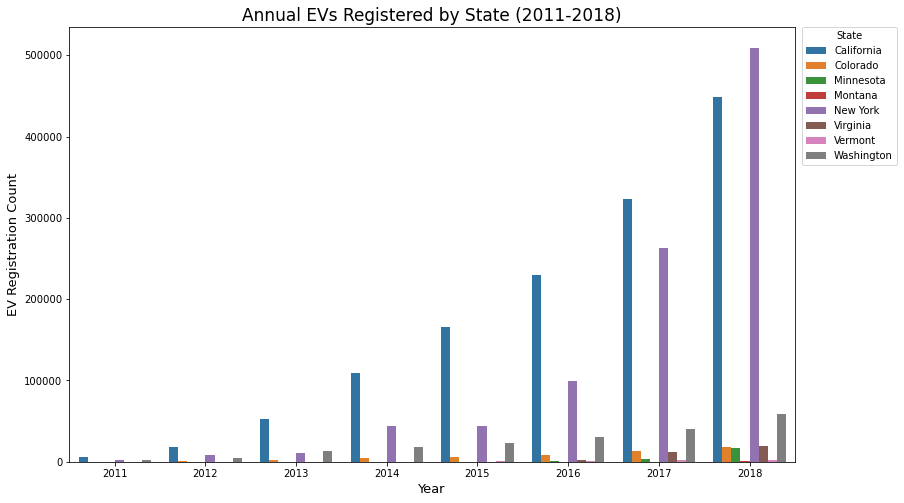

In [9]:
plt.figure(figsize=(13,8))
EVs_registered = sns.barplot(data=df, x='Year', y='EV_num', hue='State')
EVs_registered.set_title('Annual EVs Registered by State (2011-2018)',fontsize=17)
EVs_registered.set_ylabel('EV Registration Count', fontsize=13)
EVs_registered.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

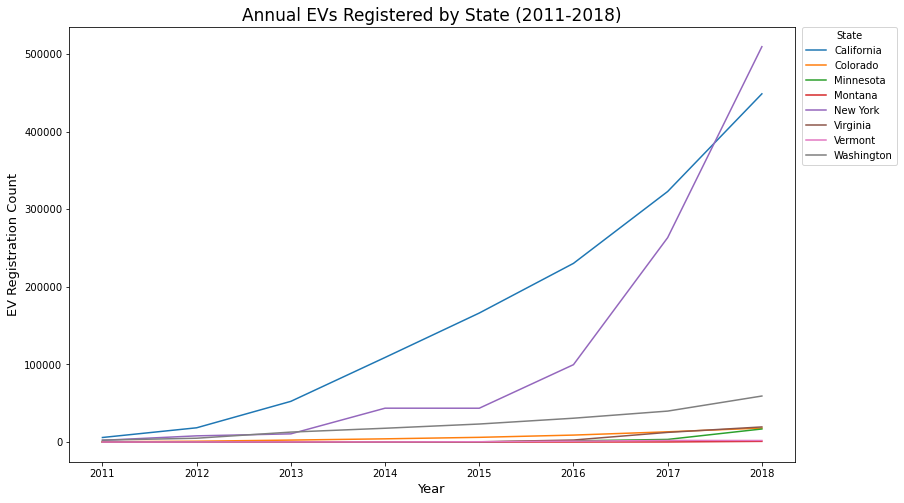

In [10]:
plt.figure(figsize=(13,8))
EVs_registered_line= sns.lineplot(data=df, x='Year', y='EV_num', hue='State')
EVs_registered_line.set_title('Annual EVs Registered by State (2011-2018)',fontsize=17)
EVs_registered_line.set_ylabel('EV Registration Count', fontsize=13)
EVs_registered_line.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

In [11]:
print("State Differences from 2011 to 2018 in EV Registrations")
print("")
df['Year'] = df['Year'].astype(str)
sub_df = df.set_index(['State', 'Year'])
EV_diff = []
for state in states:
    EV_diff.append(sub_df.loc[state, '2018'].EV_num - sub_df.loc[state, '2011'].EV_num)
x = 0
for state in states:
    print(state,": ", EV_diff[x])
    x = x + 1

State Differences from 2011 to 2018 in EV Registrations

California :  442710.0
Colorado :  17712.0
Montana :  856.0
Minnesota :  16813.0
New York :  507064.0
Vermont :  1954.0
Virginia :  19429.0
Washington :  56822.0


### Annual Cumulative EV registrations

- For each state, annual transportation energy-related carbon dioxide emissions is uniformly distributed.
- There is no outliers.
- 'Year' has no effect on 'transportation energy-related carbon dioxide emissions' regardless of states.



Text(0.5, 0, 'Year')

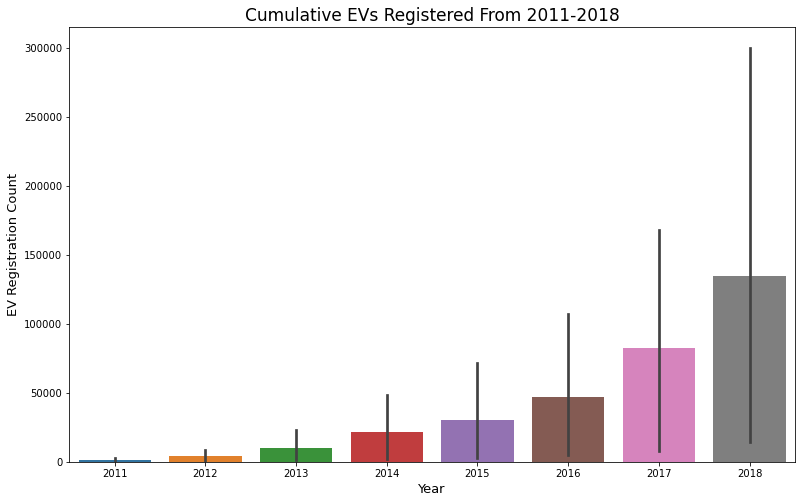

In [12]:
cumulative_ev = df['State'].str.contains('Colorado|Minnesota|Montana|Virginia|Vermont|Washington')
plt.figure(figsize=(13,8))
cumulative_ev = sns.barplot(data=df, x='Year', y='EV_num')
cumulative_ev.set_title('Cumulative EVs Registered From 2011-2018',fontsize=17)
cumulative_ev.set_ylabel('EV Registration Count', fontsize=13)
cumulative_ev.set_xlabel('Year', fontsize=13)

Text(0.5, 0, 'Year')

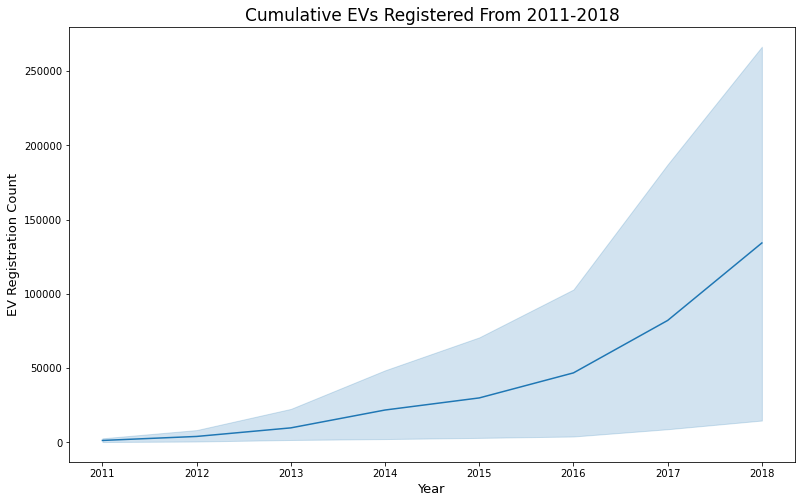

In [13]:
plt.figure(figsize=(13,8))
cumulative_ev_line = sns.lineplot(data=df, x='Year', y='EV_num')
cumulative_ev_line.set_title('Cumulative EVs Registered From 2011-2018',fontsize=17)
cumulative_ev_line.set_ylabel('EV Registration Count', fontsize=13)
cumulative_ev_line.set_xlabel('Year', fontsize=13)

### Annual C02 Emissions by State (in million metric tons)

- Renewable Energy Proportions are not uniform across each of the states.
- All states except Washington seem to have an increase in renewable energy over 2011-2018.
- Vermont has a huge jump in renewable energy between 2014-2015.

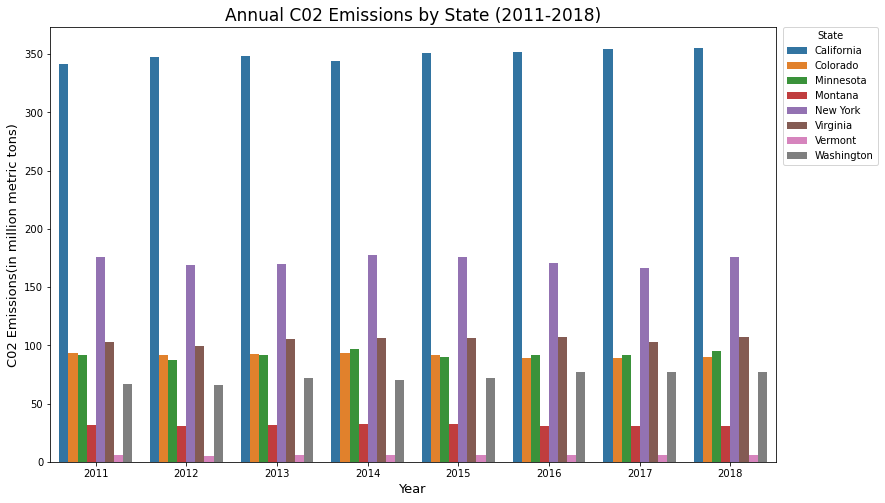

In [14]:
plt.figure(figsize=(13,8))
c02_em = sns.barplot(data=df, x='Year', y='energy_em', hue='State')
c02_em.set_title('Annual C02 Emissions by State (2011-2018)',fontsize=17)
c02_em.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
c02_em.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

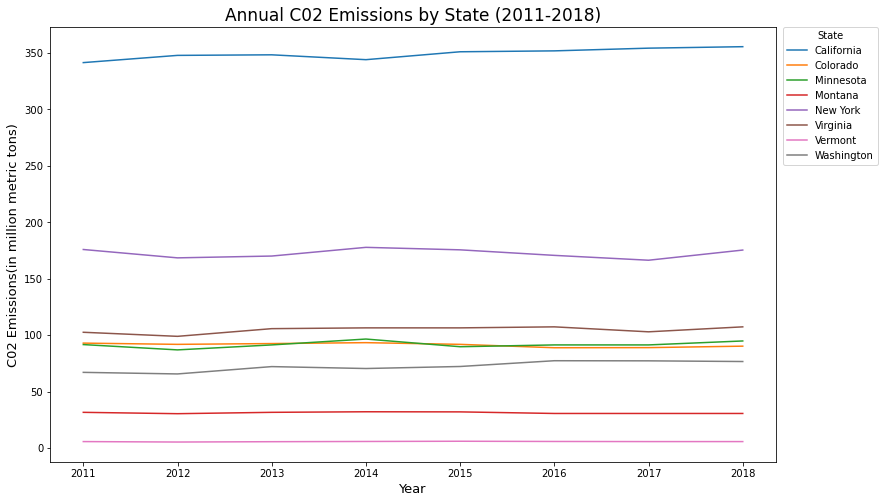

In [15]:
plt.figure(figsize=(13,8))
c02_em_line = sns.lineplot(data=df, x='Year', y='energy_em', hue='State')
c02_em_line.set_title('Annual C02 Emissions by State (2011-2018)',fontsize=17)
c02_em_line.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
c02_em_line.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

In [16]:
print("State Differences from 2011 to 2018 in Energy-Related Energy Emissions")
print("")
sub_df = df.set_index(['State', 'Year'])
energy_em_diff = []
for state in states:
    energy_em_diff.append(round(sub_df.loc[state, '2018'].energy_em - sub_df.loc[state, '2011'].energy_em,1))
x = 0
for state in states:
    print(state,": ", energy_em_diff[x])
    x = x + 1

State Differences from 2011 to 2018 in Energy-Related Energy Emissions

California :  14.1
Colorado :  -2.7
Montana :  -1.0
Minnesota :  3.2
New York :  -0.5
Vermont :  0.0
Virginia :  4.8
Washington :  9.6


### Annual Electricity-Related C02 Emissions by State (in million metric tons)

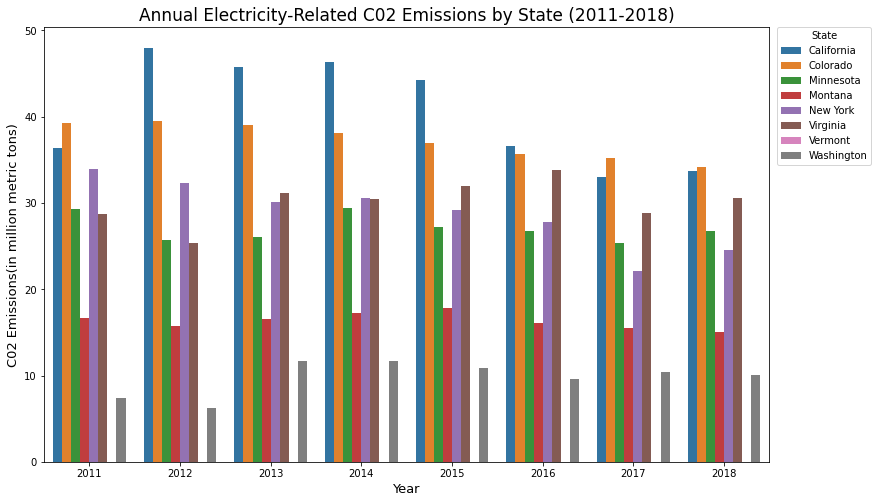

In [17]:
plt.figure(figsize=(13,8))
electricity_em = sns.barplot(data=df, x='Year', y='electric_em', hue='State')
electricity_em.set_title('Annual Electricity-Related C02 Emissions by State (2011-2018)',fontsize=17)
electricity_em.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
electricity_em.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

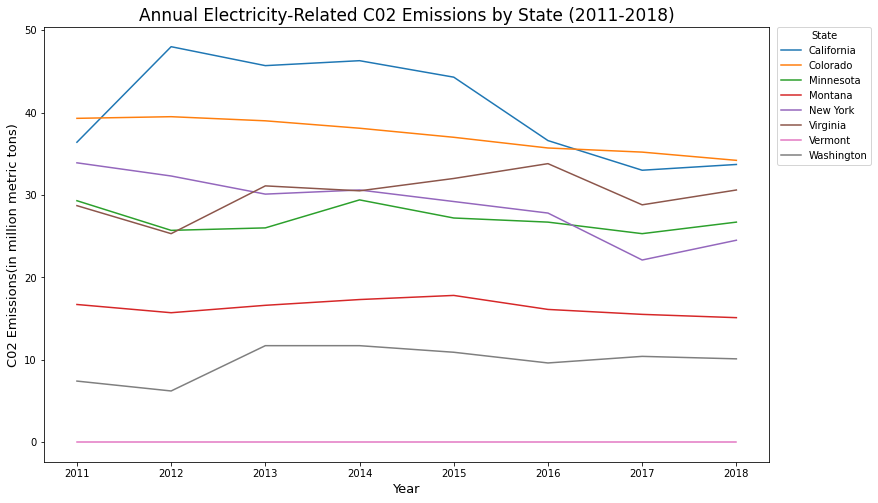

In [18]:
plt.figure(figsize=(13,8))
electricity_em_line = sns.lineplot(data=df, x='Year', y='electric_em', hue='State')
electricity_em_line.set_title('Annual Electricity-Related C02 Emissions by State (2011-2018)',fontsize=17)
electricity_em_line.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
electricity_em_line.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

In [19]:
print("State Differences from 2011 to 2018 in Electricity-Related Energy Emissions")
print("")
sub_df = df.set_index(['State', 'Year'])
electric_em_diff = []
for state in states:
    electric_em_diff.append(round(sub_df.loc[state, '2018'].electric_em - sub_df.loc[state, '2011'].electric_em,1))
x = 0
for state in states:
    print(state,": ", electric_em_diff[x])
    x = x + 1

State Differences from 2011 to 2018 in Electricity-Related Energy Emissions

California :  -2.7
Colorado :  -5.1
Montana :  -1.6
Minnesota :  -2.6
New York :  -9.4
Vermont :  0.0
Virginia :  1.9
Washington :  2.7


### Annual Transportation-Related C02 Emissions by State (in million metric tons)

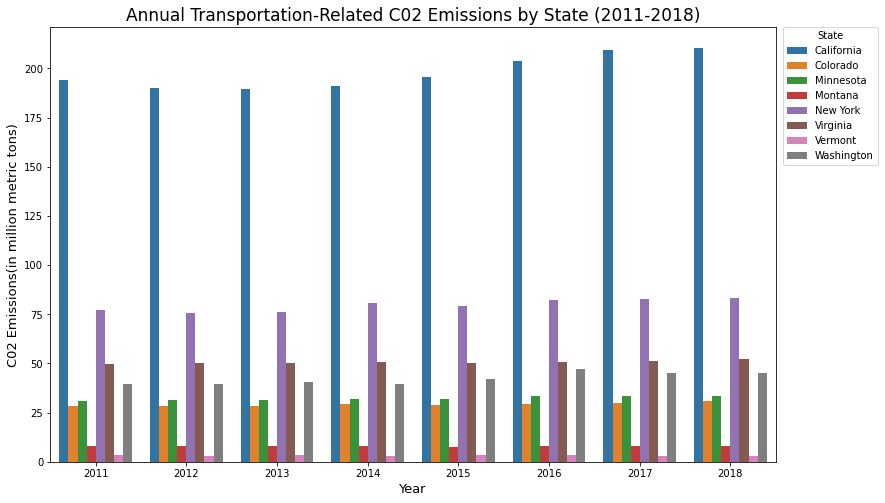

In [20]:
plt.figure(figsize=(13,8))
transportation_em = sns.barplot(data=df, x='Year', y='transportation_em', hue='State')
transportation_em.set_title('Annual Transportation-Related C02 Emissions by State (2011-2018)',fontsize=17)
transportation_em.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
transportation_em.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

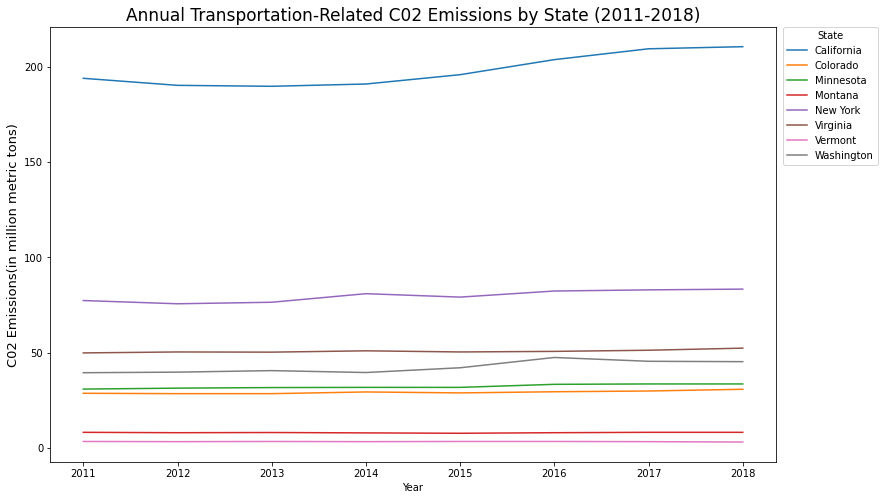

In [21]:
plt.figure(figsize=(13,8))
transportation_em_line = sns.lineplot(data=df, x='Year', y='transportation_em', hue='State')
transportation_em_line.set_title('Annual Transportation-Related C02 Emissions by State (2011-2018)',fontsize=17)
transportation_em_line.set_ylabel('C02 Emissions(in million metric tons)', fontsize=13)
electricity_em_line.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01,1), loc='upper left', borderaxespad=0)

In [22]:
print("State Differences from 2011 to 2018 in Transportation-Related Energy Emissions")
print("")
sub_df = df.set_index(['State', 'Year'])
transportation_em_diff = []
for state in states:
    transportation_em_diff.append(round(sub_df.loc[state, '2018'].transportation_em - sub_df.loc[state, '2011']
                                        .transportation_em,1))
x = 0
for state in states:
    print(state,": ", transportation_em_diff[x])
    x = x + 1

State Differences from 2011 to 2018 in Transportation-Related Energy Emissions

California :  16.6
Colorado :  2.1
Montana :  0.0
Minnesota :  2.7
New York :  6.0
Vermont :  -0.3
Virginia :  2.5
Washington :  5.8


### Annual Renewable Energy Produced by State (in megawatt hours)

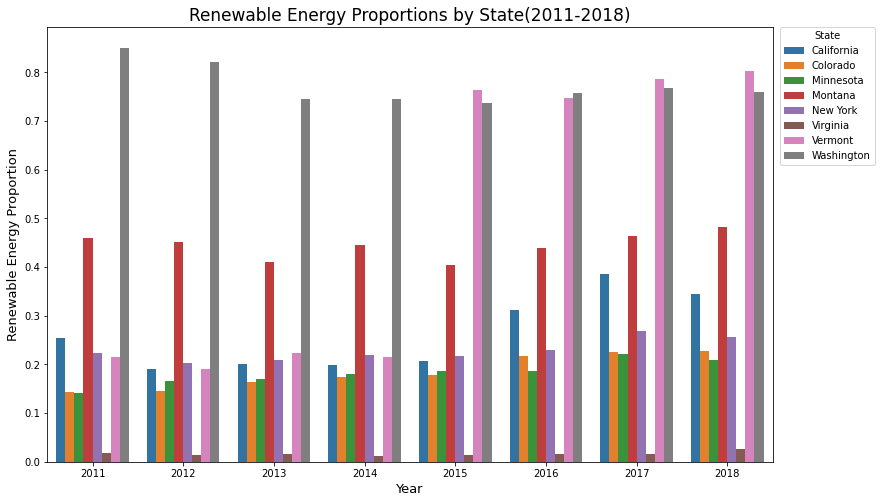

In [23]:
plt.figure(figsize=(13,8))
renewable_energy_bar = sns.barplot(data=df, x='Year', y='Proportion', hue='State')
renewable_energy_bar.set_title('Renewable Energy Proportions by State(2011-2018)', fontsize=17)
renewable_energy_bar.set_ylabel('Renewable Energy Proportion', fontsize=13)
renewable_energy_bar.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

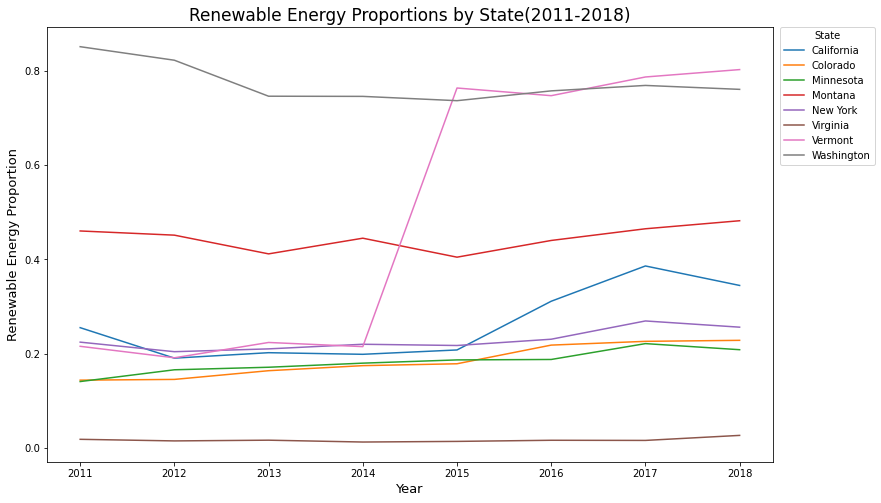

In [24]:
plt.figure(figsize=(13,8))
renewable_energy_line = sns.lineplot(data=df, x='Year', y='Proportion', hue='State')
renewable_energy_line.set_title('Renewable Energy Proportions by State(2011-2018)', fontsize=17)
renewable_energy_line.set_ylabel('Renewable Energy Proportion', fontsize=13)
renewable_energy_line.set_xlabel('Year', fontsize=13)
plt.legend(title='State', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

### EV Count and Energy-Related C02 Emissions

In [26]:
df['EV_log10'] = np.log10(df['EV_num']+0.1)

Text(3.674999999999997, 0.5, 'Energy Emissions')

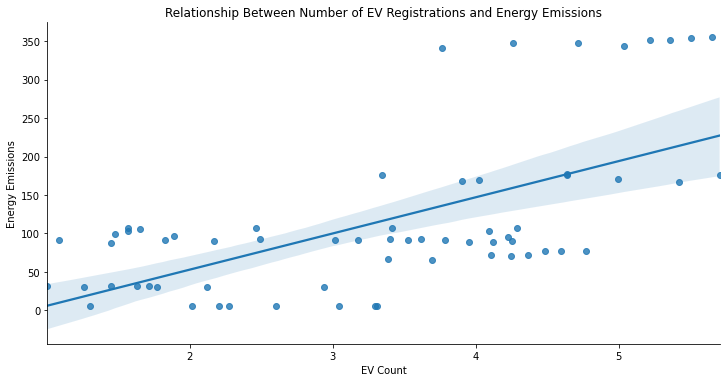

In [27]:
energy_lm_log = sns.lmplot(data=df, x='EV_log10', y='energy_em', aspect=2)
plt.title('Relationship Between Number of EV Registrations and Energy Emissions')
plt.xlabel('EV Count')
plt.ylabel('Energy Emissions')

### EV Count and Electricity-Related Energy C02 Emissions

Text(10.049999999999997, 0.5, 'Electricity-Related Energy Emissions')

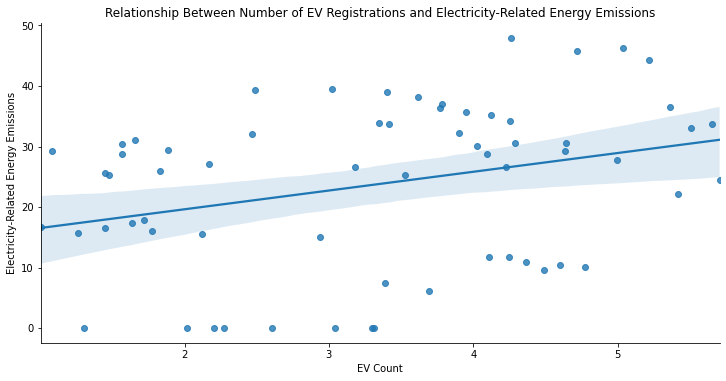

In [28]:
electricity_lm_log = sns.lmplot(data=df, x='EV_log10', y='electric_em', aspect=2)
plt.title('Relationship Between Number of EV Registrations and Electricity-Related Energy Emissions')
plt.xlabel('EV Count')
plt.ylabel('Electricity-Related Energy Emissions')

### EV Count and Transportation-Related Energy C02 Emissions

Text(3.674999999999997, 0.5, 'Transportaion-Related Energy Emissions')

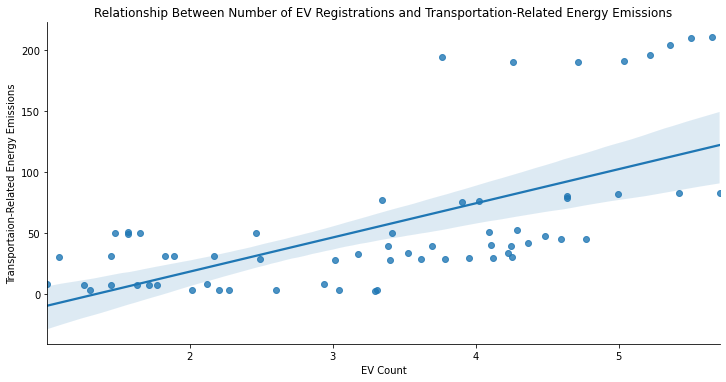

In [29]:
transportation_lm_log = sns.lmplot(data=df, x='EV_log10', y='transportation_em', aspect=2)
plt.title('Relationship Between Number of EV Registrations and Transportation-Related Energy Emissions')
plt.xlabel('EV Count')
plt.ylabel('Transportaion-Related Energy Emissions')

### Total Energy, Electricity-Related Energy, and Transportation-Related Energy Emissions

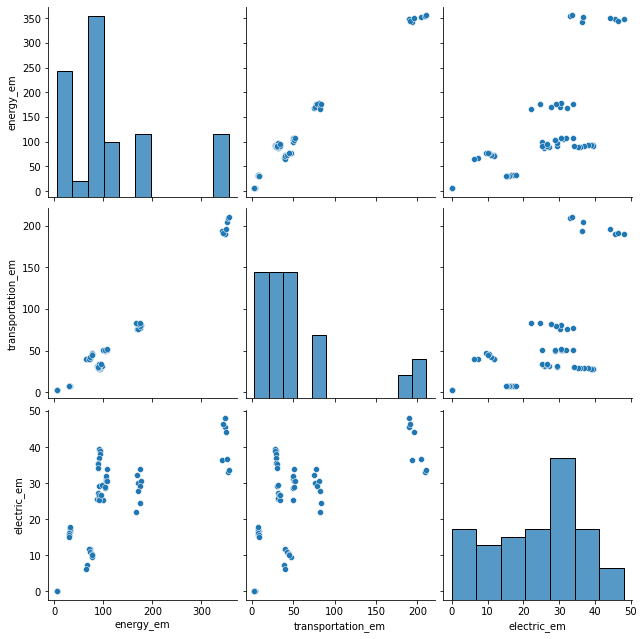

In [30]:
sns.pairplot(df, vars=['energy_em','transportation_em','electric_em'], height=3)